# Welcome to CS 5242 **Assignment 4**


In this assignment, we have three parts:
1. Implement some operations in CNNs from scratch 
2. Implement a simple CNN   
3. Implement a simple Adam and train the CNN on F-MNIST with your implemented Adam  
4. Implement a ResNet network 

You can use Colab/your personal GPUs/any other resources to run our experiments. 

In the case that you are not familiar with Colab: Colab is a hosted Jupyter notebook service that requires no setup to use, while providing access free of charge to computing resources including GPUs:
1. Login Google Colab https://colab.research.google.com/
2. In this assignment, We **need GPU** to training the CNN model. You may need to **choose GPU in Runtime -> Change runtime type -> Hardware accerator**


### **Grades Policy**

We have 10 points for this homework. 15% off per day late, 0 scores if you submit it 7 days after the deadline.

### **Cautions**

**DO NOT** copy the code from the internet, e.g. GitHub.
---

**DO NOT** use any LLMs to write the code, e.g. ChatGPT.
---

### **Contact**

Please feel free to contact us if you have any question about this homework or need any further information.

TA Email: E1154541@u.nus.edu

## Setup

Start by running the cell below to set up all required software.

In [ ]:
!pip install numpy matplotlib 
!pip install torch torchvision

Import the neccesary library and fix seed for Python, NumPy and PyTorch.

In [2]:
import math
import random

import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

Now let's setup the GPU environment. The colab provides a free GPU to use. Do as follows:

- Runtime -> Change Runtime Type -> select `GPU` in Hardware accelerator
- Click `connect` on the top-right

After connecting to one GPU, you can check its status using `nvidia-smi` command.

In [ ]:
!nvidia-smi

torch.cuda.is_available()

Everything is ready, you can move on and ***Good Luck !*** 😃

## Implement some operations in CNNs from scratch

In this section, you need to implement some operations commonly used in CNNs, including convolution and pooling. 

You need to compare the computational results of your implemented version with those of Pytorch, expecting that the error between the correct implementation and pytorch will be very small.


### Step 1
Given a 32x32 pixels, 3 channels input, get a torch tensor with torch.randn().

In [73]:
batch_size = 2
c = 3
h = 32
w = 32
x = torch.randn(batch_size, c, h, w)
print(x)
print(x.shape)

tensor([[[[-2.3002e-01,  9.0319e-01,  9.4859e-05,  ..., -3.6709e-01,
            1.6554e-01,  2.3286e-02],
          [ 5.1603e-01, -1.7944e+00, -2.5703e+00,  ...,  1.3056e-01,
           -9.1564e-01,  8.8575e-01],
          [ 2.1466e+00, -4.4602e-01,  1.2461e+00,  ..., -1.2272e+00,
           -9.1861e-01,  1.1698e+00],
          ...,
          [ 8.9052e-02,  8.0534e-01,  1.3020e+00,  ...,  2.1811e-01,
           -2.0249e-01,  1.5905e+00],
          [ 3.3189e-02,  4.1342e-01, -1.0487e+00,  ...,  1.6939e-01,
           -4.9047e-01, -3.4419e-01],
          [ 3.3421e-01, -1.0691e+00,  1.4868e-01,  ..., -1.4740e+00,
            7.3409e-01,  5.9989e-02]],

         [[ 2.0880e+00,  1.1973e+00,  1.1863e+00,  ...,  1.8344e-01,
            7.2866e-01,  1.9558e-01],
          [-6.8334e-01,  7.0545e-01,  3.9726e-02,  ..., -1.1506e+00,
            1.5440e-01, -4.1330e-01],
          [-4.6735e-01,  1.0698e+00, -7.7515e-01,  ..., -9.8049e-01,
            3.0993e-01,  1.3772e-01],
          ...,
     

### Step 2
We first implement these operations with Pytorch so that we can compare the computational results of our implemented version with those of original pytorch.


In [4]:

# 1. Build a max pooling layer torch_max_pool with Pytorch. The kernel size of the pooling is 2, the stride is 2, and there is not any padding.
torch_max_pool = nn.MaxPool2d(kernel_size=2,
                              stride=2,
                              padding=0)

# 2. Build a average pooling layer torch_avg_pool with Pytorch. The kernel size of the pooling is 2, the stride is 1. The padding shoulbd be set to 1.
torch_avg_pool = nn.AvgPool2d(kernel_size=2,
                              stride=1,
                              padding=1)

# 3.Build a 2D convolutional layer torch_conv with Pytorch. The kernel size of the convolution is 3. Stride is 1. The input channel and output channel should be set to 3 and 64, respectively. We use zero padding to keep the spatial size of the output feature.
torch_conv = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# 2D batchnorm with channel=3
torch_norm = nn.BatchNorm2d(3)

In [5]:
torch_max_pool_out = torch_max_pool(x)
print(torch_max_pool_out.shape)

torch_avg_pool_out = torch_avg_pool(x)
print(torch_avg_pool_out.shape)

torch_conv_out = torch_conv(x)
print(torch_conv_out.shape)

torch_norm_out = torch_norm(x)
print(torch_norm_out.shape)

torch.Size([2, 3, 16, 16])
torch.Size([2, 3, 33, 33])
torch.Size([2, 64, 32, 32])
torch.Size([2, 3, 32, 32])


### Step 3

Implement these operations from scratch. Output your tensors as "my_xxx_out".

In [100]:
torch_max_pool(x2)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[21., 23.],
          [29., 31.]],

         [[37., 39.],
          [45., 47.]],

         [[53., 55.],
          [61., 63.]],

         [[69., 71.],
          [77., 79.]],

         [[85., 87.],
          [93., 95.]]]])

In [107]:
def my_max_pool(x, kernel_size, stride, padding):

    N, C_in, H_in, W_in = x.shape # 2, 3, 16, 16
    H_out = (H_in + 2*padding - kernel_size) // stride + 1
    W_out = (W_in + 2*padding - kernel_size) // stride + 1
    y = None
    # === Complete the code
    # print(N, C_in, H_in, W_in, H_out, W_out)
    # print(type(N), type(C_in), type(H_in), type(W_in), type(H_out), type(W_out))
    y = torch.empty((N, C_in, H_out, W_out), dtype=x.dtype)
    for n in range(N):
        for c in range(C_in):
            for i in range(H_out):
                i_start = i*stride
                i_end = i*stride + kernel_size
                for j in range(W_out):
                    j_start = j*stride
                    j_end = j*stride + kernel_size
                    y[n][c][i][j] = torch.max(x[n][c][i_start:i_end, j_start:j_end]) # Using np.max will give weird error on This causes the weird error about dim/axis
    # === Complete the code
    return y

### TEST
x2 = torch.arange(96, dtype=torch.float32).reshape(1, 6, 4, 4)
my_max_pool(x2, 2, 1, 0)

tensor([[[[ 5.,  6.,  7.],
          [ 9., 10., 11.],
          [13., 14., 15.]],

         [[21., 22., 23.],
          [25., 26., 27.],
          [29., 30., 31.]],

         [[37., 38., 39.],
          [41., 42., 43.],
          [45., 46., 47.]],

         [[53., 54., 55.],
          [57., 58., 59.],
          [61., 62., 63.]],

         [[69., 70., 71.],
          [73., 74., 75.],
          [77., 78., 79.]],

         [[85., 86., 87.],
          [89., 90., 91.],
          [93., 94., 95.]]]])

In [94]:
def my_avg_pool(x, kernel_size, stride, padding):
    """
    Args:
        x: torch tensor with size (N, C_in, H_in, W_in),
        kernel_size: size of the window, 
        stride: stride of the window,
        padding: implicit zero padding to be added on both sides,
        
    Return:
        y: torch tensor of size (N, C_out, H_out, W_out).
    """
    N, C_in, H_in, W_in = x.shape # 2, 3, 16, 16
    H_out = int((H_in - kernel_size + 2*padding)/stride + 1)
    W_out = int((W_in - kernel_size + 2*padding)/stride + 1)
    y = None
    # === Complete the code
    # print(N, C_in, H_in, W_in, H_out, W_out)
    # print(type(N), type(C_in), type(H_in), type(W_in), type(H_out), type(W_out))
    y = torch.ones((N, C_in, H_out, W_out))
    for n in range(N):
        for c in range(C_in):
            for i in range(H_out):
                i_start = i*stride
                i_end = i*stride + stride
                for j in range(W_out):
                    j_start = j*stride
                    j_end = j*stride + stride
                    y[n][c][i][j] = torch.sum(x[n][c][i_start:i_end, j_start:j_end])/(kernel_size**2)
    # === Complete the code
    return y

In [89]:
def my_conv(x, in_channels, out_channels, kernel_size, stride, padding):
    """
    Args:
        x: torch tensor with size (N, C_in, H_in, W_in),
        in_channels: number of channels in the input image, it is C_in;
        out_channels: number of channels produced by the convolution;
        kernel_size: size of onvolving kernel, 
        stride: stride of the convolution,
        padding: implicit zero padding to be added on both sides of each dimension,
        
    Return:
        y: torch tensor of size (N, C_out, H_out, W_out)
    """
    N, C_in, H_in, W_in = x.shape
    H_out = int((H_in - kernel_size + 2*padding) / stride + 1)
    W_out = int((W_in - kernel_size + 2*padding) / stride + 1)
    # === Complete the code
    weight = torch.randn(out_channels, kernel_size*kernel_size*in_channels)
    bias = torch.randn(1)
    assert weight.shape == (out_channels, kernel_size*kernel_size*in_channels), f"weight shape ({weight.shape}) doesn't match kernel shape of (out_channels, {kernel_size*kernel_size*in_channels})"
    unfold = nn.Unfold(kernel_size=(kernel_size, kernel_size), stride=stride, padding=padding)
    X_cols = unfold(x) # (12, 961)
    Z_conv = weight@X_cols + bias
    Z_reshape = torch.reshape(Z_conv, (N, out_channels, H_out, W_out))
    A_conv = torch.relu(Z_reshape)
    y = A_conv
    # === Complete the code
    return y

#TEST 1
x2 = torch.randn(1, 3, 5, 5)
# weight = torch.randn(6, 12)
# bias = torch.randn(1)
y = my_conv(x2, 3, 6, 2, 1, 0)
y.shape

torch.Size([1, 6, 4, 4])

In [50]:
# TEST 2
x3 = torch.randn(2, 3, 32, 32)
weight = torch.randn(6, 12)
bias = torch.randn(1)
y = my_conv(x3, 3, 6, 2, 1, 0, weight, bias)
y.shape


torch.Size([2, 6, 31, 31])

In [72]:
def my_batchnorm(x, num_features, eps=1e-5):
    """
    Args:
        x: torch tensor with size (N, C, H, W),
        num_features: number of features in the input tensor, it is C;
        eps: a value added to the denominator for numerical stability. Default: 1e-5
        
    Return:
        y: torch tensor of size (N, C, H, W)
    """
    N, C, H, W = x.shape
    y = torch.empty_like(x)
    # === Complete the code
    for i in range(N):
        for j in range(C):
            cur_x = x[i][j]
            y[i][j] = (cur_x - cur_x.mean())/np.sqrt(cur_x.var() - eps)
    # === Complete the code 
    return y

# TEST 
x3 = torch.arange(75, dtype=torch.float32).reshape(1, 3, 5, 5)
my_batchnorm(x3, 3).shape


/var/folders/ck/9b11n2w53xs60_hyctmdfv5r0000gn/T/ipykernel_25104/2319467591.py:17: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y[i][j] = (cur_x - cur_x.mean())/np.sqrt(cur_x.var() - eps)


torch.Size([1, 3, 5, 5])

In [105]:
my_max_pool_out = my_max_pool(x, kernel_size=2, stride=2, padding=0)
my_avg_pool_out = my_avg_pool(x, kernel_size=2, stride=1, padding=1)
my_conv_out = my_conv(x,
                      in_channels=3,
                      out_channels=64,
                      kernel_size=3,
                      stride=1,
                      padding=1)
my_norm_out = my_batchnorm(x, num_features=3, eps=1e-5)

/var/folders/ck/9b11n2w53xs60_hyctmdfv5r0000gn/T/ipykernel_25104/2319467591.py:17: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y[i][j] = (cur_x - cur_x.mean())/np.sqrt(cur_x.var() - eps)


### Step 4

Compare and show that "torch_xxx_out" and "my_xxx_out" are equal up to small numerical errors.

In [106]:
print(F.mse_loss(my_max_pool_out, torch_max_pool_out))
print(F.mse_loss(my_avg_pool_out, torch_avg_pool_out))
print(F.mse_loss(my_conv_out, torch_conv_out))
print(F.mse_loss(my_norm_out, torch_norm_out))

tensor(0.9990)
tensor(0.2919)
tensor(16.9381, grad_fn=<MseLossBackward0>)
tensor(2.0372, grad_fn=<MseLossBackward0>)


I am not sure why my values are so different, but I don't have time to debug now. 

## Implement a simple CNN and an Adam optimizer and train the CNN on Fashion MNIST using the implemented Adam.

### Step 1
Create datasets. The MNIST data set is composed fashion images with labels from 0 to 9. It consists of 60,000 training samples and 10,000 test samples. Each sample is a 28 * 28 pixel grayscale digit image.

![Alt text](image-3.png)

#### Class labels

```
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
```


In [4]:
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

train_set = torchvision.datasets.FashionMNIST(
    root = 'FashionMNIST/',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

test_set = torchvision.datasets.FashionMNIST(
    root = 'FashionMNIST/',
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100)

In [3]:
for images, labels in train_loader:
    print(images.shape)  # batch of images
    print(labels.shape)  # batch of labels
    break  # just look at the first batch

torch.Size([100, 1, 28, 28])
torch.Size([100])


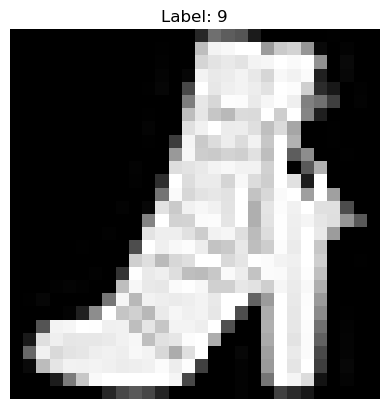

In [4]:
import matplotlib.pyplot as plt

# Get one batch from train_loader
images, labels = next(iter(train_loader))
n = 11
# Select the first image and label
img = images[n].squeeze()  # Remove channel dimension if needed
label = labels[n].item()

plt.imshow(img, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

### Step 2
Create the model.
You can build a simple convolutional neural network to conduct the classification. You may refine the architecture based on the accuracy. You can also try different learning rates.
**The test accuracy should achieve 85%.**


In [5]:
images.shape

torch.Size([100, 1, 28, 28])

In [ ]:
conv = nn.Conv2d(in_channels=1,
                out_channels=3, # Fixed to 3 feature maps
                kernel_size=2, 
                stride=1,
                padding=0) 
bn = nn.BatchNorm2d(3)
relu = nn.ReLU()
maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

A_conv = conv(images) #(100, 3, 27, 27)
A_bn = bn(A_conv) #(100, 3, 27, 27)
A_relu = relu(A_bn) #(100, 3, 27, 27)
A_out = maxpool(A_relu) # [100, 3, 13, 13]

In [7]:
A_out.shape

torch.Size([100, 3, 13, 13])

In [2]:

class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv = nn.Conv2d(in_channels=1,
                       out_channels=3, # Fixed to 3 feature maps
                       kernel_size=2, 
                       stride=1,
                       padding=0) 
        self.bn = nn.BatchNorm2d(3)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(3 * 13 * 13, 10)


    def forward(self, input):
        x = self.conv(input)      # (N, 3, 27, 27)
        x = self.bn(x)            # (N, 3, 27, 27)
        x = self.relu(x)          # (N, 3, 27, 27)
        x = self.maxpool(x)       # (N, 3, 13, 13)
        x = self.flatten(x)       # (N, 507)
        x = self.fc(x)            # (N, 10)
        return x

cnn_network = Network()

### Step 3

Implement the Adam optimizer by your self. 

In [7]:
from typing import Iterable, Tuple

import torch
from torch import nn
from torch.optim import Optimizer


class MyAdam(Optimizer):
    """
    Implements Adam algorithm with weight decay fix as introduced in [Decoupled Weight Decay
    Regularization](https://arxiv.org/abs/1711.05101).

    Parameters:
        params (`Iterable[nn.parameter.Parameter]`):
            Iterable of parameters to optimize or dictionaries defining parameter groups.
        lr (`float`, *optional*, defaults to 0.001):
            The learning rate to use.
        betas (`Tuple[float,float]`, *optional*, defaults to `(0.9, 0.999)`):
            Adam's betas parameters (b1, b2).
        eps (`float`, *optional*, defaults to 1e-06):
            Adam's epsilon for numerical stability.
        weight_decay (`float`, *optional*, defaults to 0.0):
            Decoupled weight decay to apply.
        correct_bias (`bool`, *optional*, defaults to `True`):
            Whether or not to correct bias in Adam (for instance, in Bert TF repository they use `False`).
    """

    def __init__(
        self,
        params: Iterable[nn.parameter.Parameter],
        lr: float = 1e-3,
        betas: Tuple[float, float] = (0.9, 0.999),
        eps: float = 1e-6,
        weight_decay: float = 0.0,
        correct_bias: bool = True,
    ):
        if lr < 0.0:
            raise ValueError(f"Invalid learning rate: {lr} - should be >= 0.0")
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError(f"Invalid beta parameter: {betas[0]} - should be in [0.0, 1.0)")
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError(f"Invalid beta parameter: {betas[1]} - should be in [0.0, 1.0)")
        if not 0.0 <= eps:
            raise ValueError(f"Invalid epsilon value: {eps} - should be >= 0.0")
        defaults = {"lr": lr, "betas": betas, "eps": eps, "weight_decay": weight_decay, "correct_bias": correct_bias}
        super().__init__(params, defaults)

    @torch.no_grad()
    def step(self):
        """
        Performs a single optimization step.
        """
        loss = None

        for group in self.param_groups:
            for p in group["params"]:
                if p.grad is None:
                    continue
                grad = p.grad
                state = self.state[p]
                if "step" not in state:
                    state["step"] = 0
                
                # State initialization
                if "exp_avg" not in state:
                    # Exponential moving average of gradient values
                    state["exp_avg"] = torch.zeros_like(grad)
                    # Exponential moving average of squared gradient values
                    state["exp_avg_sq"] = torch.zeros_like(grad)

                exp_avg, exp_avg_sq = state["exp_avg"], state["exp_avg_sq"]
                beta1, beta2 = group["betas"]
                state["step"] += 1
                eps = group['eps'] 
                step_size = group["lr"]

                # Decay the first and second moment running average coefficient
                # === Complete the code
                exp_avg = beta1 * exp_avg + (1-beta1) * grad
                exp_avg_sq = beta2 * exp_avg_sq + (1-beta2) * grad**2
                # === Complete the code

                # for the decayed first and second moment, apply the bias correction operation.
                if group["correct_bias"]: 
                    # === Complete the code

                    bias_correction1 = exp_avg/(1-beta1**(state["step"]))
                    bias_correction2 = exp_avg_sq/(1-beta2**(state["step"]))
                    # === Complete the code
                    

                # === Complete the code
                norm_grad = grad - step_size*(bias_correction1/torch.sqrt(bias_correction2 + eps))
                # === Complete the code
            
            if group["weight_decay"] > 0:
                p.mul_(1 - group["lr"] * group["weight_decay"])  
            p.add_(norm_grad, alpha=-step_size)    

        return loss

### Step 4

Build the train and test loops

In [8]:
# try different learning rate\weight decay\epoch_num and find the suitable one (there is no need to find the best configuration, just find the suitable one)
# you can also try different other hyperparameters like the eps\betas of adam.
optimizer = MyAdam(cnn_network.parameters(), lr=0.01, weight_decay=0.01, eps=1e-6) 
epoch_num = 3

for epoch in range(epoch_num):
    total_loss = 0
    total_correct = 0
    for batch in train_loader:  
        images, labels = batch
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        optimizer.zero_grad()  
        preds = cnn_network(images)
        loss = F.cross_entropy(preds, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _,prelabels=torch.max(preds,dim=1)
        total_correct += (prelabels==labels).sum().item()
    accuracy = total_correct/len(train_set)
    print("Epoch:%d  ,  Loss:%f  , Train Accuracy:%f "%(epoch, total_loss, accuracy * 100))


correct=0
total=0
cnn_network.eval()
with torch.no_grad():
    for batch in test_loader:
        imgs,labels=batch
        if torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
        preds=cnn_network(imgs)
        _,prelabels=torch.max(preds,dim=1)
        total=total+labels.size(0)
        correct=correct+int((prelabels==labels).sum())
        
    accuracy=correct / total
    print("Test Accuracy: ", accuracy * 100)

Epoch:0  ,  Loss:1431.669943  , Train Accuracy:13.088333 
Epoch:1  ,  Loss:1406.858679  , Train Accuracy:12.603333 
Epoch:2  ,  Loss:1398.355911  , Train Accuracy:12.160000 
Test Accuracy:  11.93


# Implement a ResNet network with PyTorch 
ResNet is a type of CNN (Convolutional Neural Network) that was considered to be one of the best computer vision models in 2016.
https://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf

Here is the configuration of the network from its paper. **To know more details, you need to read the paper carefully.** Now, you need to implement **Config 34-Layer** it with Pytorch.

![Alt text](image-2.png)

In [ ]:
import torch
from torch import nn

class ResNet_34Layer(nn.Module):
    def __init__(self, ) -> None:
        super().__init__()
    
    def forward(image):
        
        return x


Then, please **manually** calculate the number of parameters of **Config 34-Layer**. Please do not use other libraries e.g fvcore.
